In [1]:
%cd /mnt/i/Yuki/workspace/exercises/nlp_100_knock

/mnt/i/Yuki/workspace/exercises/nlp_100_knock


https://nlp100.github.io/ja/ch04.html

# 準備

In [2]:
import itertools
import collections
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family']='IPAexGothic'

# 問題

## 30. 形態素解析結果の読み込み

In [3]:
parsed_result_path = 'Question_30_39/neko.txt.mecab'

In [4]:
with open(parsed_result_path, 'r', encoding='utf8') as f:
    parsed_result = f.read()

In [5]:
sentence_infos = []
word_infos = []
for info_line in parsed_result.split('\n'):
    info = info_line.split('\t')
    if len(info) <= 1:
        if info_line == 'EOS' and word_infos:
            sentence_infos.append(word_infos)
            word_infos = []
        continue
    surface, grammer_info_line = info
    if surface == '' or surface == '\u3000':
        continue
    grammer_infos = grammer_info_line.split(',')
    pos = grammer_infos[0]
    pos1 = grammer_infos[1]
    base = grammer_infos[6]
    word_infos.append({
        'surface': surface,
        'pos': pos,
        'pos1': pos1,
        'base': base,
    })

In [6]:
word_infos = list(itertools.chain.from_iterable(sentence_infos))
word_infos[:100]

[{'surface': '一', 'pos': '名詞', 'pos1': '数', 'base': '一'},
 {'surface': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'base': '吾輩'},
 {'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'},
 {'surface': '猫', 'pos': '名詞', 'pos1': '一般', 'base': '猫'},
 {'surface': 'で', 'pos': '助動詞', 'pos1': '*', 'base': 'だ'},
 {'surface': 'ある', 'pos': '助動詞', 'pos1': '*', 'base': 'ある'},
 {'surface': '。', 'pos': '記号', 'pos1': '句点', 'base': '。'},
 {'surface': '名前', 'pos': '名詞', 'pos1': '一般', 'base': '名前'},
 {'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'},
 {'surface': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'base': 'まだ'},
 {'surface': '無い', 'pos': '形容詞', 'pos1': '自立', 'base': '無い'},
 {'surface': '。', 'pos': '記号', 'pos1': '句点', 'base': '。'},
 {'surface': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'base': 'どこ'},
 {'surface': 'で', 'pos': '助詞', 'pos1': '格助詞', 'base': 'で'},
 {'surface': '生れ', 'pos': '動詞', 'pos1': '自立', 'base': '生れる'},
 {'surface': 'た', 'pos': '助動詞', 'pos1': '*', 'base': 'た'},
 {'surface': 'か', 'pos': '助詞', 'p

## 31. 動詞

In [7]:
verb_surfaces = set([info['surface'] for info in word_infos if info['pos'] == '動詞'])

In [8]:
verb_surfaces

{'果さ',
 '巡り',
 'れる',
 '立て',
 '覆せ',
 '見える',
 '有す',
 '見上ぐる',
 '飛びつい',
 '活け',
 '助け',
 'いよ',
 '浸っ',
 '通り抜ける',
 '舞っ',
 'とめ',
 '続ける',
 'ざんす',
 '懸ら',
 '醸す',
 '立ち上がっ',
 '忍ば',
 '捨てる',
 '汚れ',
 '問い掛ける',
 '平伏し',
 '奉っ',
 'のみ',
 '近づく',
 '与',
 'がたつく',
 '改まる',
 '続か',
 '付く',
 'いい',
 '追い出し',
 '羨ま',
 '押しつける',
 '命じ',
 '折ら',
 'しめつける',
 '見くびら',
 'ねじり',
 '開け放っ',
 '寄せる',
 'こり',
 '求む',
 '引きずり',
 '集まれ',
 '這入ら',
 'もらわ',
 'ささ',
 '申し渡し',
 'わす',
 '拡げ',
 '迎えれ',
 'かん',
 '攻め',
 '越し',
 'ふさい',
 '送っ',
 '押し返し',
 '転じ',
 '取り留め',
 'かま',
 '申し合せ',
 'わか',
 'めで',
 '通し',
 '掛り',
 '叱りつけ',
 '燻っ',
 '傾け',
 '決める',
 '因っ',
 'つかっ',
 'ぶ',
 '欠く',
 '引き受ける',
 '引きあげる',
 'こすっ',
 '見習お',
 '中る',
 '膨れ',
 '押し通そ',
 '痛ん',
 '曲る',
 '飲ん',
 '滑っ',
 '劣る',
 'あばれ',
 '考えつい',
 'しかけ',
 '起こし',
 '言う',
 '目だた',
 '収め',
 '仰ぐ',
 '分から',
 '書き入れ',
 '羨む',
 '得ろ',
 'みよ',
 '逢わ',
 '見抜い',
 '倍し',
 '執っ',
 '残っ',
 '彫り',
 '垂れん',
 '支え',
 'やれん',
 '読める',
 'おっしゃっ',
 '考えれ',
 '浴びせかける',
 '敗れ',
 'からかい',
 '砕い',
 'やり直す',
 'あやまっ',
 '成し',
 '作っ',
 '申さ',
 '飲も',
 '抛り',
 'あやまれ',
 'きめ',
 'たた',
 '成っ'

## 32. 動詞の原形

In [9]:
verb_bases = set([info['base'] for info in word_infos if info['pos'] == '動詞'])

In [10]:
verb_bases

{'れる',
 '逝く',
 '立ち入る',
 '朽ちる',
 '見える',
 '有す',
 '翻す',
 '突き当る',
 '通り抜ける',
 '続ける',
 '醸す',
 '捨てる',
 '問い掛ける',
 '近づく',
 '生き延びる',
 'がたつく',
 '片づく',
 '改まる',
 '付く',
 '頂く',
 '押しつける',
 '連れ出す',
 'しめつける',
 '届ける',
 '寄せる',
 '求む',
 '見計らう',
 '差しかかる',
 'たとえる',
 '組み合せる',
 '言い放つ',
 '決める',
 '抱え込む',
 '具える',
 '変える',
 '剥がれる',
 '欠く',
 '引き受ける',
 '肥る',
 '引きあげる',
 '中る',
 '上がれる',
 '裏返す',
 '取り残す',
 '曲る',
 '劣る',
 'えむ',
 '言う',
 '仰ぐ',
 '羨む',
 'かぐ',
 '読める',
 '見届ける',
 '浴びせかける',
 'やり直す',
 'だく',
 '蒸す',
 '留る',
 '回る',
 'そり返る',
 '干す',
 '這入る',
 'くりゃる',
 'く',
 '視る',
 'こうる',
 '印す',
 '敲く',
 '掠める',
 '書き流す',
 '映ずる',
 '勤める',
 '号する',
 '現われる',
 '臭う',
 '併せる',
 '整える',
 '浮かぶ',
 '見廻る',
 'うたう',
 '受け取る',
 '燻る',
 'おっしゃる',
 '照らす',
 'おろす',
 '持ち切る',
 '抜ける',
 '縮める',
 '交う',
 '揃う',
 '形づくる',
 '延ばす',
 'わく',
 '引込む',
 'つかう',
 'いる',
 '離れる',
 '生き返る',
 '奉る',
 '叩き付ける',
 'ころばす',
 '噛む',
 'かたどる',
 '流す',
 '称する',
 '読み出す',
 'つかまえる',
 '寄り付く',
 '申し立てる',
 'ぐれる',
 '覚る',
 '究める',
 '堪る',
 '迷わす',
 '傾ける',
 '歴る',
 '売れ残る',
 '走る',
 '避ける',
 '浮く',
 '描く',
 '滑り込む',
 '合せる',
 '駆

## 33. 「AのB」

In [11]:
extracted = []
for sentence_info in sentence_infos:
    phrase = []
    status = 'not_found'
    for word_info in sentence_info:
        if status == 'not_found':
            if word_info['pos'] == '名詞':
                phrase.append(word_info['surface'])
                status = 'noun'
        elif status == 'noun':
            if word_info['surface'] == 'の':
                phrase.append(word_info['surface'])
                status = 'genitive'
            else:
                phrase = []
                status = 'not_found'
        elif status == 'genitive':
            if word_info['pos'] == '名詞':
                phrase.append(word_info['surface'])
                extracted.append(phrase)
            phrase = []
            status = 'not_found'

In [12]:
extracted

[['彼', 'の', '掌'],
 ['掌', 'の', '上'],
 ['書生', 'の', '顔'],
 ['はず', 'の', '顔'],
 ['顔', 'の', '真中'],
 ['穴', 'の', '中'],
 ['書生', 'の', '掌'],
 ['何', 'の', '事'],
 ['肝心', 'の', '母親'],
 ['藁', 'の', '上'],
 ['笹原', 'の', '中'],
 ['池', 'の', '前'],
 ['池', 'の', '上'],
 ['一樹', 'の', '蔭'],
 ['垣根', 'の', '穴'],
 ['隣家', 'の', '三'],
 ['時', 'の', '通路'],
 ['一刻', 'の', '猶予'],
 ['家', 'の', '内'],
 ['彼', 'の', '書生'],
 ['以外', 'の', '人間'],
 ['前', 'の', '書生'],
 ['おさん', 'の', '隙'],
 ['胸', 'の', '痞'],
 ['家', 'の', '主人'],
 ['主人', 'の', '方'],
 ['鼻', 'の', '下'],
 ['吾輩', 'の', '顔'],
 ['自分', 'の', '住'],
 ['吾輩', 'の', '主人'],
 ['家', 'の', 'もの'],
 ['うち', 'の', 'もの'],
 ['彼', 'の', '書斎'],
 ['本', 'の', '上'],
 ['皮膚', 'の', '色'],
 ['本', 'の', '上'],
 ['彼', 'の', '毎夜'],
 ['主人', 'の', '傍'],
 ['彼', 'の', '膝'],
 ['経験', 'の', '上'],
 ['飯櫃', 'の', '上'],
 ['炬燵', 'の', '上'],
 ['ここ', 'の', 'うち'],
 ['供', 'の', '寝床'],
 ['彼等', 'の', '中間'],
 ['供', 'の', '一'],
 ['例', 'の', '神経'],
 ['次', 'の', '部屋'],
 ['自分', 'の', '勝手'],
 ['吾輩', 'の', '方'],
 ['台所', 'の', '板の間'],
 ['吾輩', 'の', '尊敬'],
 ['そこ', 'の', '

## 34. 名詞の連接

In [13]:
extracted = []
for sentence_info in sentence_infos:
    nouns = []
    prev_word_is_noun = False
    for word_info in sentence_info:
        if word_info['pos'] == '名詞':
            nouns.append(word_info['surface'])
            prev_word_is_noun = True
        else:
            if prev_word_is_noun:
                extracted.append(nouns)
                nouns = []
            prev_word_is_noun = False

In [14]:
[v for v in extracted if len(v) >= 2]

[['人間', '中'],
 ['一番', '獰悪'],
 ['時', '妙'],
 ['一', '毛'],
 ['その後', '猫'],
 ['一', '度'],
 ['ぷうぷうと', '煙'],
 ['邸', '内'],
 ['三', '毛'],
 ['書生', '以外'],
 ['四', '五', '遍'],
 ['この間', 'おさん'],
 ['三', '馬'],
 ['御台', '所'],
 ['まま', '奥'],
 ['住', '家'],
 ['終日', '書斎'],
 ['勉強', '家'],
 ['勉強', '家'],
 ['勤勉', '家'],
 ['二', '三', 'ページ'],
 ['主人', '以外'],
 ['限り', '吾輩'],
 ['朝', '主人'],
 ['一番', '心持'],
 ['二', '人'],
 ['一つ', '床'],
 ['一', '人'],
 ['最後', '大変'],
 ['——', '猫'],
 ['神経', '胃弱', '性'],
 ['物', '指'],
 ['尻', 'ぺたをひどく'],
 ['言語', '同断'],
 ['家内', '総', 'がかり'],
 ['筋', '向'],
 ['白', '君'],
 ['度', '毎'],
 ['白', '君'],
 ['先日', '玉'],
 ['四', '疋'],
 ['三', '日', '目'],
 ['四', '疋'],
 ['白', '君'],
 ['我', '等', '猫', '族'],
 ['家族', '的', '生活'],
 ['三', '毛', '君'],
 ['所有', '権'],
 ['我々', '同族', '間'],
 ['目', '刺'],
 ['一番', '先'],
 ['彼等', '人間'],
 ['我', '等'],
 ['吾', '人'],
 ['白', '君'],
 ['三', '毛', '君'],
 ['間違い', 'だらけ'],
 ['後架', '先生'],
 ['宗', '盛'],
 ['宗', '盛'],
 ['月給', '日'],
 ['水彩', '絵具'],
 ['毎日', '毎日', '書斎'],
 ['人', 'の'],
 ['自ら', '筆'],
 ['眼鏡', '越'],
 ['一室', '内']

## 35. 単語の出現頻度

In [15]:
word_counter = collections.Counter([word_info['base'] for word_info in word_infos])
words = sorted(word_counter.items(), key=lambda x: x[1], reverse=True)

In [16]:
words

[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5972),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('「', 3231),
 ('」', 3225),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('*', 2191),
 ('で', 2084),
 ('から', 2031),
 ('いる', 1777),
 ('ん', 1568),
 ('か', 1529),
 ('云う', 1408),
 ('事', 1207),
 ('です', 1164),
 ('ます', 1146),
 ('なる', 1120),
 ('へ', 1034),
 ('う', 987),
 ('もの', 981),
 ('君', 973),
 ('主人', 932),
 ('ぬ', 719),
 ('よう', 696),
 ('見る', 675),
 ('ね', 657),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('思う', 502),
 ('よ', 502),
 ('吾輩', 481),
 ('来る', 460),
 ('れる', 450),
 ('じゃ', 450),
 ('…', 433),
 ('これ', 414),
 ('さ', 410),
 ('それ', 381),
 ('聞く', 347),
 ('でも', 346),
 ('時', 345),
 ('行く', 340),
 ('出来る', 324),
 ('三', 319),
 ('出る', 317),
 ('な', 317),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('やる', 311),
 ('二', 303),
 ('上', 294),
 ('いい', 294),
 ('寒月', 286),
 ('顔', 282),


## 36. 頻度上位10語

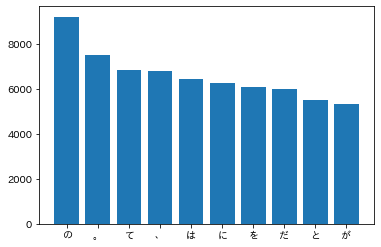

In [17]:
N = 10

labels, heights = zip(*words[:N])
xs = np.arange(N) + 1

plt.bar(xs, heights, tick_label=labels, align="center")

plt.show()

## 37. 「猫」と共起頻度の高い上位10語

In [18]:
extracted = []
for sentence_info in sentence_infos:
    for word_info in sentence_info:
        if word_info['base'] == '猫':
            extracted += [word_info['base'] for word_info in sentence_info]
            break

In [19]:
word_counter = collections.Counter(extracted)
words = sorted(word_counter.items(), key=lambda x: x[1], reverse=True)

In [20]:
import matplotlib
matplotlib.rcParams['font.family']='IPAexGothic'

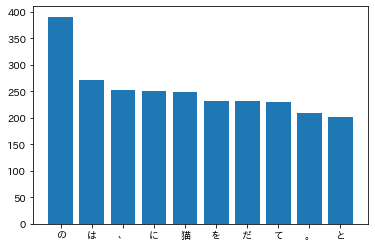

In [21]:
N = 10

labels, heights = zip(*words[:N])
xs = np.arange(N) + 1

plt.bar(xs, heights, tick_label=labels, align="center")

plt.show()

## 38. ヒストグラム

In [22]:
word_counter = collections.Counter([word_info['base'] for word_info in word_infos])
words = sorted(word_counter.values(), reverse=True)

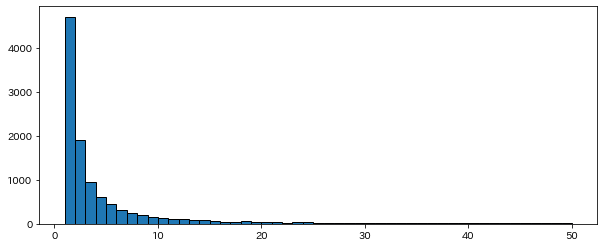

In [23]:
plt.figure(figsize=(10, 4))
plt.hist(words, bins=49, range=(1, 50), ec='black')

plt.show()

## 39. Zipfの法則

In [24]:
word_counts = sorted(collections.Counter([word_info['base'] for word_info in word_infos]).values(), reverse=True)

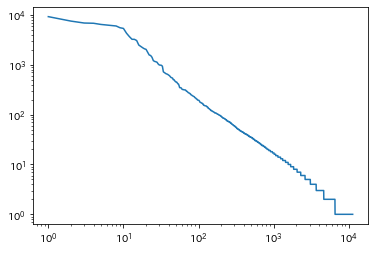

In [25]:
ranks = np.arange(len(word_counts)) + 1
plt.plot(ranks, word_counts)
plt.xscale('log')
plt.yscale('log')

plt.show()